
# **INSTALL**


In [1]:
! pip install kaggle

In [2]:


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
!cp /content/drive/MyDrive/Colab\ Notebooks/kaggle.json ~/.kaggle/kaggle.json

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess


Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 97% 417M/428M [00:03<00:00, 130MB/s]
100% 428M/428M [00:03<00:00, 120MB/s]


In [7]:
!unzip toronto-emotional-speech-set-tess.zip


Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_burn_angry.wav  
  inflating: TESS Toronto emotional spee

In [8]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import glob
from pathlib import Path


import IPython

from scipy.io.wavfile import read, write

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import sklearn

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model, save_model

# **Load Data**

In [9]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [10]:
len(paths)

2800

In [11]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,angry
1,/content/tess toronto emotional speech set dat...,angry
2,/content/tess toronto emotional speech set dat...,angry
3,/content/tess toronto emotional speech set dat...,angry
4,/content/tess toronto emotional speech set dat...,angry


In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['label'])

df.head()


,speech,label,encoded_label
0,/content/tess toronto emotional speech set dat...,angry,0
1,/content/tess toronto emotional speech set dat...,angry,0
2,/content/tess toronto emotional speech set dat...,angry,0
3,/content/tess toronto emotional speech set dat...,angry,0
4,/content/tess toronto emotional speech set dat...,angry,0


In [13]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'ps': 5, 'sad': 6}


In [14]:
df.isnull().sum()

speech           0
label            0
encoded_label    0
dtype: int64

In [15]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   speech         2800 non-null   object
 1   label          2800 non-null   object
 2   encoded_label  2800 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 65.8+ KB


# **Visualize**

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

**Fear**

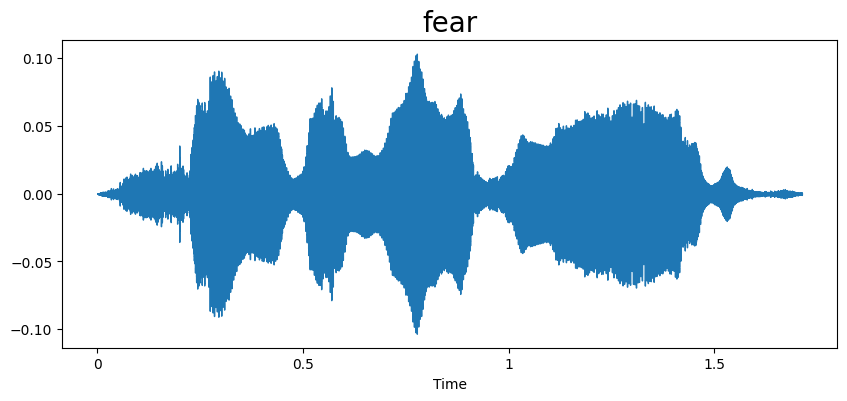

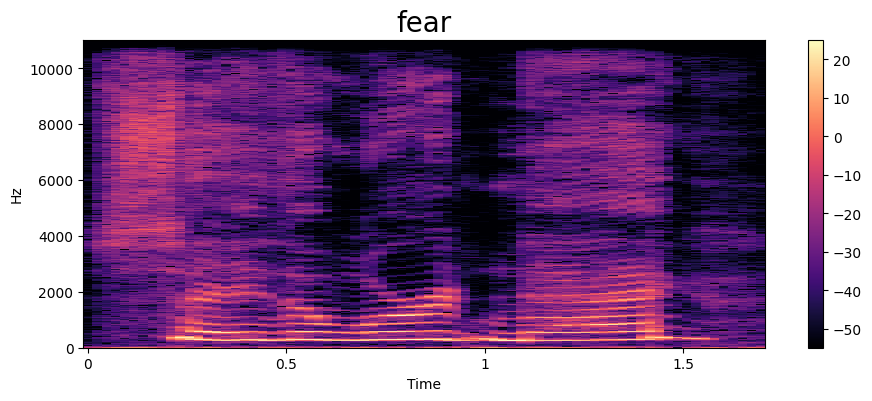

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Angry**

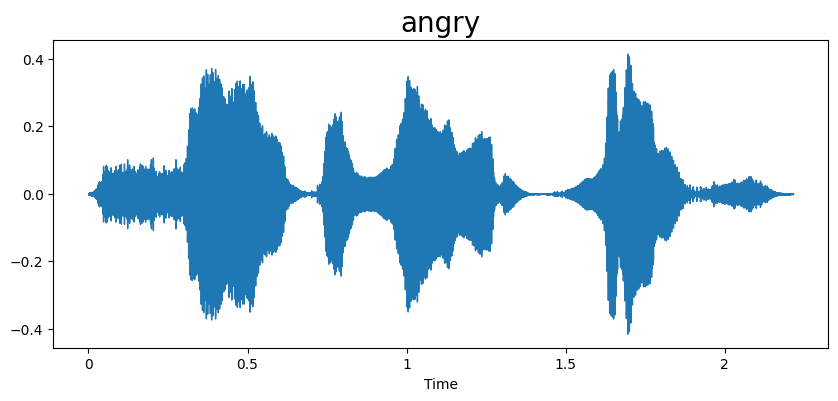

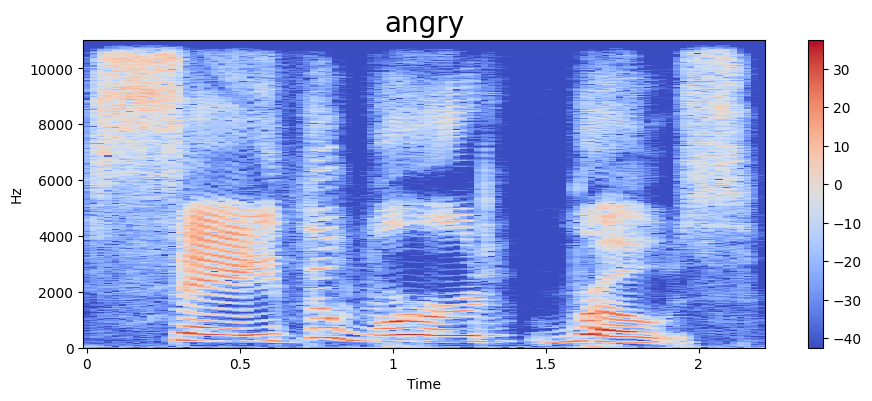

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Disgust**

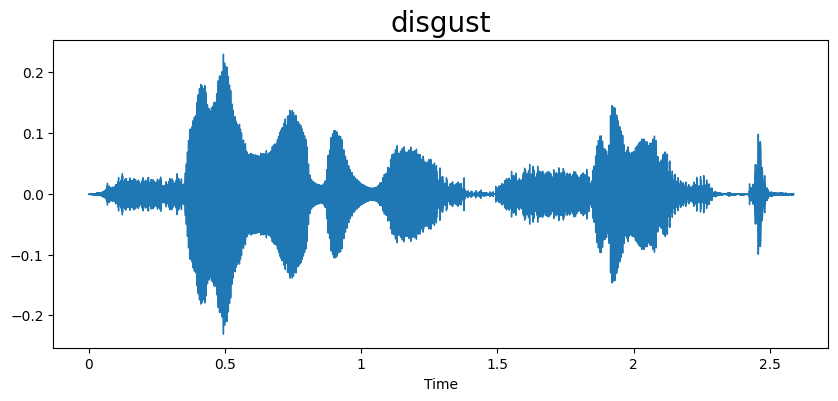

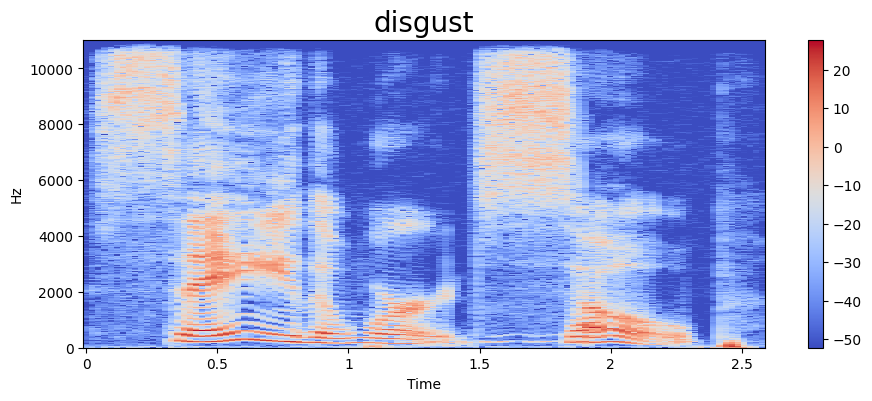

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Neutral**

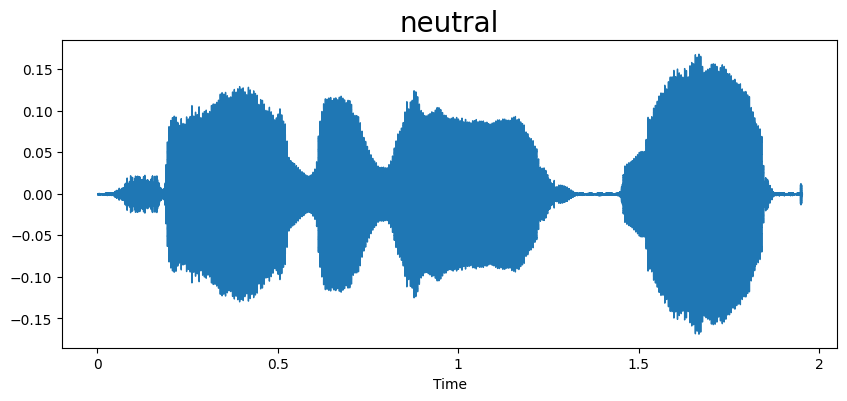

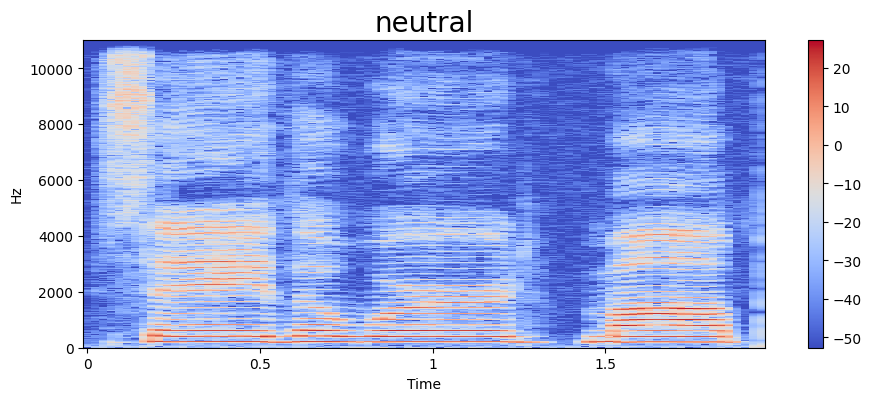

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Sad**

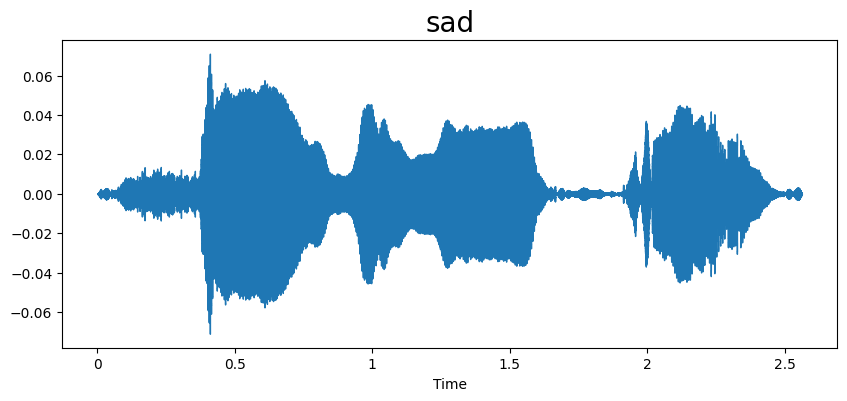

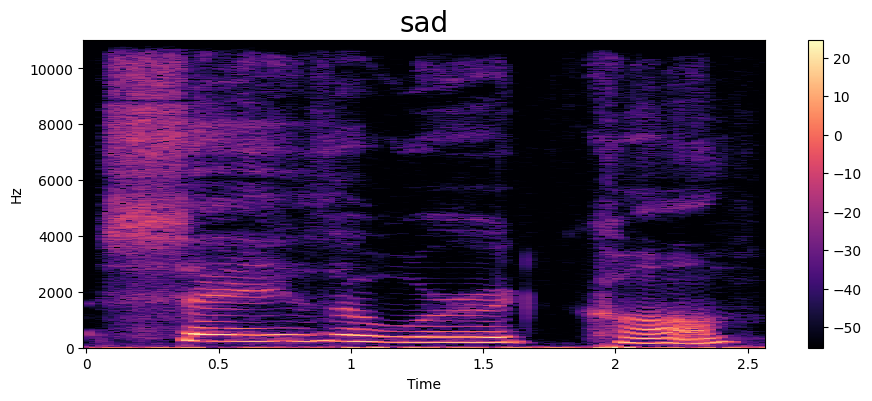

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Pleasant Surprise**

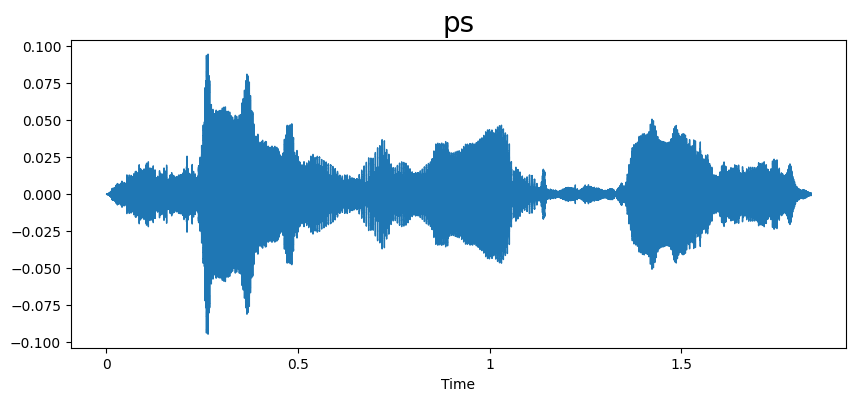

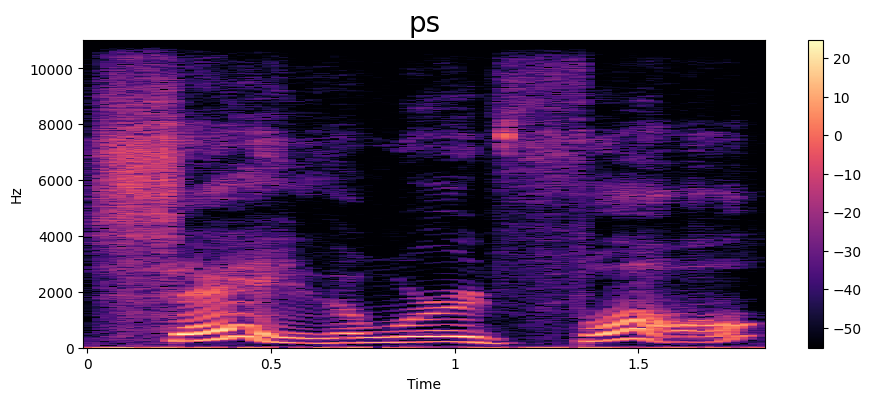

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Happy**

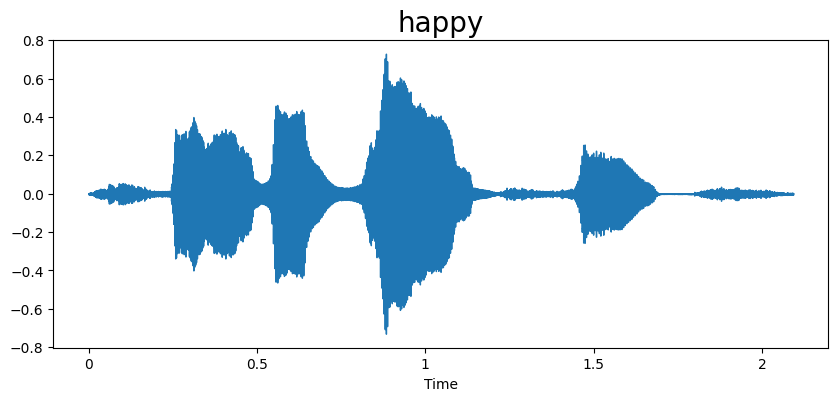

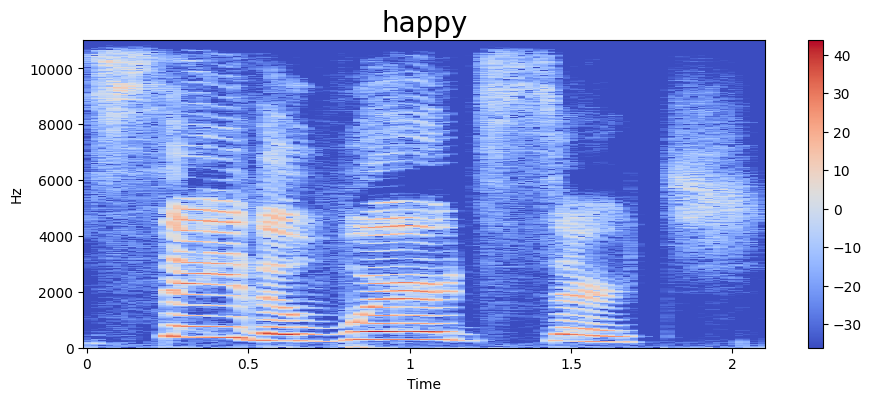

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# **Model**

In [17]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc
extract_mfcc(df['speech'][0])

X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

X = [x for x in X_mfcc]
X = np.array(X)
X.shape
X = np.expand_dims(X, -1)
X.shape
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [19]:
history = model.fit(X, y, validation_split=0.2, epochs=20, batch_size=64)


# Save the model
model.save('TESS_model.h5')

Epoch 1/20
35/35 [==============================] - 13s 245ms/step - loss: 1.1730 - accuracy: 0.5375 - val_loss: 1.1872 - val_accuracy: 0.5125
Epoch 2/20
35/35 [==============================] - 6s 158ms/step - loss: 0.5008 - accuracy: 0.8263 - val_loss: 0.7329 - val_accuracy: 0.7518
Epoch 3/20
35/35 [==============================] - 7s 208ms/step - loss: 0.2459 - accuracy: 0.9259 - val_loss: 0.8071 - val_accuracy: 0.7554
Epoch 4/20
35/35 [==============================] - 7s 187ms/step - loss: 0.1944 - accuracy: 0.9406 - val_loss: 0.8334 - val_accuracy: 0.7143
Epoch 5/20
35/35 [==============================] - 10s 299ms/step - loss: 0.1226 - accuracy: 0.9656 - val_loss: 0.8656 - val_accuracy: 0.7607
Epoch 6/20
35/35 [==============================] - 12s 336ms/step - loss: 0.1514 - accuracy: 0.9536 - val_loss: 1.0762 - val_accuracy: 0.6268
Epoch 7/20
35/35 [==============================] - 8s 228ms/step - loss: 0.1348 - accuracy: 0.9563 - val_loss: 1.1822 - val_accuracy: 0.6071
Epo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
